<a href="https://colab.research.google.com/github/shreeganeshasharma/ParticleSimulations/blob/main/ShearCycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Random organization in periodically driven systems](https://https://www.nature.com/articles/nphys891/#Sec3)

Author : Shree Ganesha Sharma M S

Date : July 20th 2023

# Initial configuration

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

#Set a seed for random number generation
np.random.seed(44)

#Box coordinates
x_low = 0
y_low = 0
x_high = 1
y_high = 1
#Area of square
A = (y_high - y_low)*(x_high - x_low)

#Area fraction
phi = 0.2
#Number of particles
N = 1000

#diameter of a particle
d = np.sqrt(A * phi / (N * np.pi / 4))

#Number of shear cycles
Ncycles = 200

#Initialize the box
#List of N particle centers
particles = []

#Add a particle to the box
particles.append(np.random.uniform(low = [x_low, y_low], high = [x_high, y_high]))

#Add N-1 particles in random such that none of them overlap
while len(particles) < N:
  new_particle = np.random.uniform(low = [x_low, y_low], high = [x_high, y_high])
  if all(np.linalg.norm(new_particle - particles, axis=1) > d) == True:
    particles.append(new_particle)

particles = np.array(particles)

#Save initial configuration for all methods
init = particles

# Method 0
Displace an active particle as many times as it collides

In [ ]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa1 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
partilces = init
sheared = init

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles
"""TODO - use modulus for periodic boundary conditions - Done"""

for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N)

  sheared = np.array([[particle[0] + particle[1]/gamma0, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa1[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
    new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
    particles[p] = new_particle
""""""
#Make activity an array of arrays and append the index of all colliding particles to it
#Use any and get positions of collisions

In [ ]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
sheared = particles

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles
"""TODO - use modulus for periodic boundary conditions"""

for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N)

  sheared = np.array([[particle[0] + particle[1]/gamma0, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa2[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
    new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
    particles[p] = new_particle

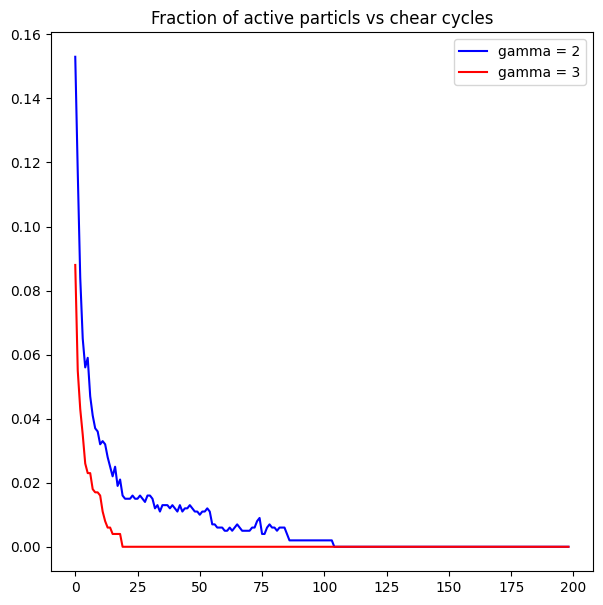

In [ ]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Method 1
Shear cycles with colliding pairs displaced by the **different** random numbers.

The displacemtn might increase or decrease the distance between the pair.

In [ ]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa1 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
sheared = particles

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa1[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
      #Figure1 of the paper shows that particles are displaced by different random numbers and nothing about clash resolution is mentioned
      """
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacemnt in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      """
      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

In [ ]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
sheared = particles

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
      #Figure1 of the paper shows that particles are displaced by different random numbers and nothing about clash resolution is mentioned
      """
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacemnt in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      """
      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

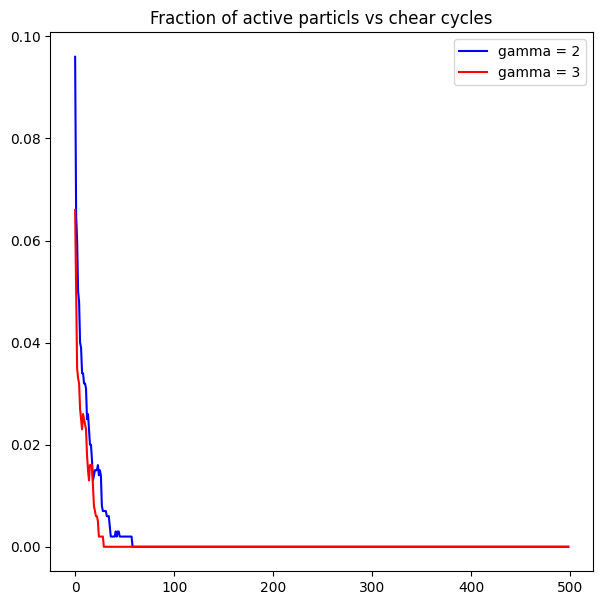

In [ ]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Misc

In [ ]:
"""
#Plot initial configuration
fig,ax=plt.subplots(figsize=(7.5,7.4))
ax.set_aspect(1)
ax.set_title("Initial position of particles")
plt.xlim(x_low-0.1, x_high+0.1)
plt.ylim(y_low-0.1, y_high+0.1)

for particle in particles:
    ax.add_artist(plt.Circle((particle[0], particle[1]), d/2, color='b', fill = False))
plt.show()"""

In [ ]:
print(particles[index1], particles[index2[0]])
print(displacement1, displacement2)
print((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

[0.99025391 0.6413615 ] [0.9992676  0.62704784]
[-0.00212164 -0.00483799] [-0.00122031 -0.00491834]
[-0.00991502  0.01439401]


0.017478418781756756

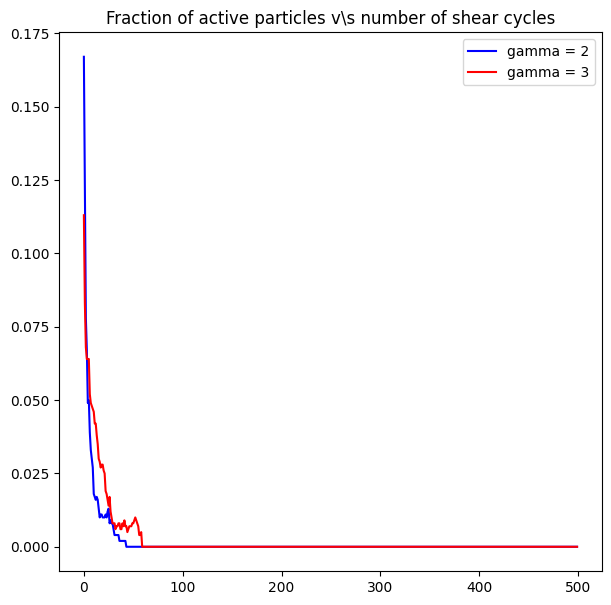

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fil1 = np.genfromtxt("/content/sample_data/fraction2_500.csv", delimiter = ',')
fil2 = np.genfromtxt("/content/sample_data/fraction3_500.csv", delimiter = ',')

plt.figure(figsize=(7, 7))
plt.title("Fraction of active particles v\s number of shear cycles")
plt.plot(fil1, 'b', label = "gamma = 2")
plt.plot(fil2, 'r', label = "gamma = 3")
plt.legend()
plt.show()

[0.16  0.113 0.091 ... 0.    0.    0.   ]


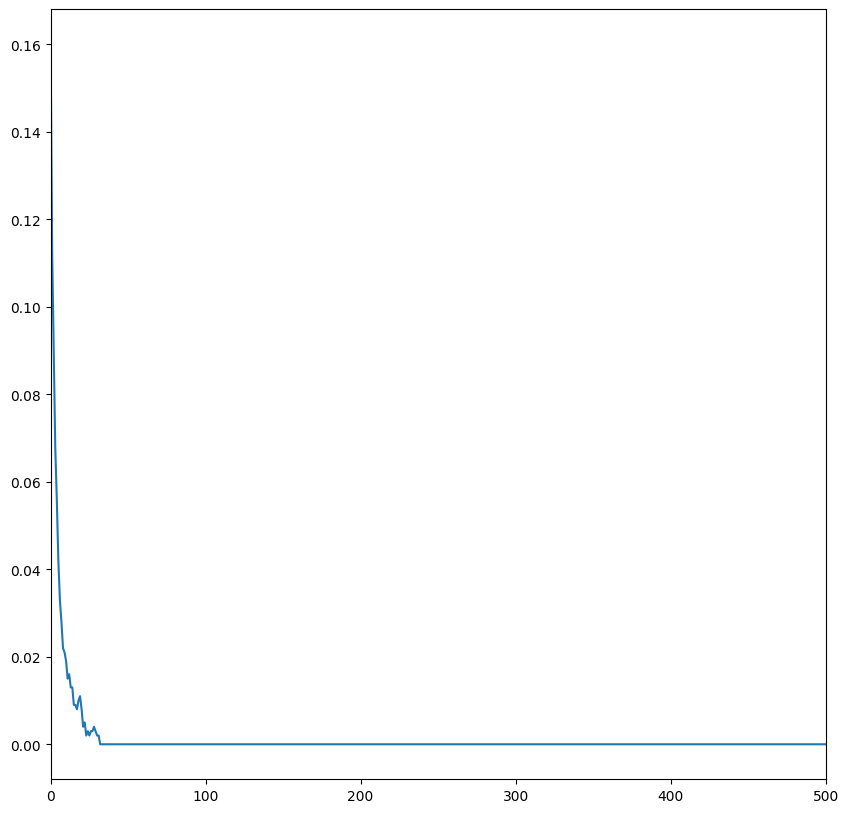

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fil = np.genfromtxt("/content/sample_data/fraction2_5000.csv", delimiter = ',')
print(fil)
plt.figure(figsize=(10, 10))
plt.xlim(0, 500)
plt.plot(fil)

In [ ]:
print(index2)

activity[index2[0]]
print(np.where(activity[index2[0]] == index1)[0][0])

[908]
0


In [ ]:
print(particles[index1])
print(particles[index2[0]])
print(np.linalg.norm(particles[index2[0]] - particles[index1]))
print(d)

[-0.51581555  1.04178664]
[-0.52332952  1.05644584]
0.01647276242985486
0.01595769121605731


In [ ]:
a = {1: [2, 3]}
print(a)
a[1].remove(a[1][0])
print(a)
a[1].remove(a[1][0])
print(a)
print(a[1] != [])

a = {1: np.array([2, 3])}
print(a[1][0])
print(np.delete(a[1], 0, 0))
a[1] = np.delete(a[1], 0, 0)
print(np.delete(a[1], 0, 0))
a[1] = np.delete(a[1], 0, 0)
print(a[1], a[1].size)

print(2.5%2)

{1: [2, 3]}
{1: [3]}
{1: []}
False
2
[3]
[]
[] 0
0.5


In [ ]:
  for i in activity.keys():
    #current particle
    #particle1 = particles[i]
    while activity[i] != []:
      #First encountered particle - first in the list of indices of ith particle
      #particle2 = particles[activity[i][0]]
      #Common random displacement for every pair of collision
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l * np.cos(theta), l * np.sin(theta)])

      #Should I cerify that this random displacement doesn't cause collision in original configuration
      #if all(np.linalg.norm(new_particle - np.delete(particles, p, 0), axis=1) > d) == True:
      #But takes too long

      #Displace the original positions
      #particle1 += displacement
      #particle2 += displacement
      particles[i] += displacement
      particles[activity[i][0]] += displacement
      #This completes displacing a pair for a particular key

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      np.delete(activity[activity[i][0]], np.where(activity[activity[i][0]] == i), axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      np.delete(activity[i], 0, axis = 0)

In [ ]:
  #Revert to original positions and,
  #Random displacement of active particles in pairs
  for i in range(len(activity)):
    #current particle
    particle1 = particles[activity.keys[i]]
    while activity[i] != []:
      #encountered particle
      particle2 = particles[activity[i]]
      #Common random displacement for every pair of collision
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l * np.cos(theta), l * np.sin(theta)])

      #Should I cerify that this random displacement doesn't cause collision in original configuration
      #if all(np.linalg.norm(new_particle - np.delete(particles, p, 0), axis=1) > d) == True:
      #But takes too long

      #Displace the original positions
      particle1 += displacement
      particle2 += displacement

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      np.delete(activity[i], np.where(activity[i] == activity.keys[i]), axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      np.delete(activity[i], index = 0, axis = 0)

      #This completes displacing a pair

<class 'numpy.ndarray'>


In [ ]:
a = np.array([1, 2])
b = np.array([2, 3])
a + b

array([3, 5])

# Method 2
Replace a particle as many times as it collides at once

In [ ]:
#Proportion of active particles in each shear cycle
fa = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
sheared = particles

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(1, Ncycles):
  print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N)

  sheared = np.array([[particle[0] + particle[1]/gamma0, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    for i in range(int(activity[p])):
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
      #Verify random displacement doesn't cause collision in original configuration
      #if all(np.linalg.norm(new_particle - np.delete(particles, p, 0), axis=1) > d) == True:
      #But takes too long
      particles[p] = new_particle

#Make activity an array of arrays and append the index of all colliding particles to it
#Use any and get positions of collisions
"""TODO - use modulus for periodic boundary conditions"""

# Method 4
Shear cycles with colliding pairs displaced by the SAME random number until the pair is separated.

Agnostic to whether the pair collides with the remaining particles.

# Method 5
The new position should not collide with any other particles.